In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= (10.0 ,8.0)
from scipy import stats
from scipy.stats import norm


In [2]:
import warnings

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#train.head()
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test.shape

(1459, 80)

In [5]:
#train.info

In [6]:
# Check if there is missing values in the data
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
#Calculating the percentage of missing values
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace = True)

type(miss)

pandas.core.series.Series

In [8]:
# let's visualize the missing values

miss = miss.to_frame()
# here miss is a series, so for creating dataframe we use to_frame()

miss.columns = ["Counts"] # giving name to the coloumn
miss.index.names = ["Name"] # giving name to the index
miss['Names'] = miss.index  # creating one more column same name as index
miss


,Counts,Names
Name,,
Electrical,0.000685,Electrical
MasVnrType,0.005479,MasVnrType
MasVnrArea,0.005479,MasVnrArea
BsmtQual,0.025342,BsmtQual
BsmtCond,0.025342,BsmtCond
BsmtFinType1,0.025342,BsmtFinType1
BsmtExposure,0.026027,BsmtExposure
BsmtFinType2,0.026027,BsmtFinType2
GarageCond,0.055479,GarageCond


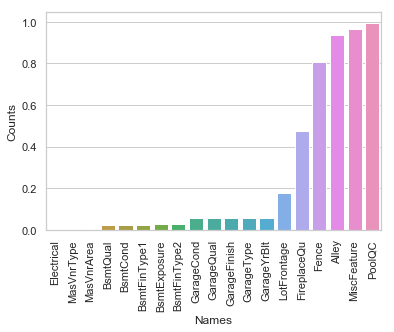

In [9]:
# let's plot the missing value count

sns.set(style="whitegrid", color_codes = True)
sns.barplot(x = 'Names', y = 'Counts',data = miss)
plt.xticks(rotation = 90)
plt.show()   # only plt.show , no use sns.plt.show()



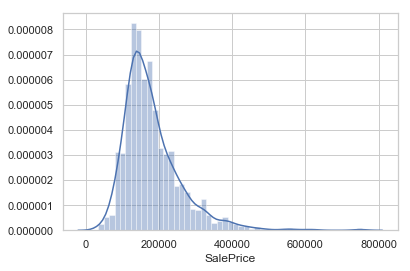

In [10]:
sns.distplot(train['SalePrice'])   #Saleprice distribution

We see that the target variable SalePrice has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [11]:
print("The skewness of Saleprice is: {}".format(train["SalePrice"].skew()))

The skewness of Saleprice is: 1.8828757597682129


Let's log transform this variable and see if this variable distribution can get any closer to normal.

Target skew values is:0.12133506220520406


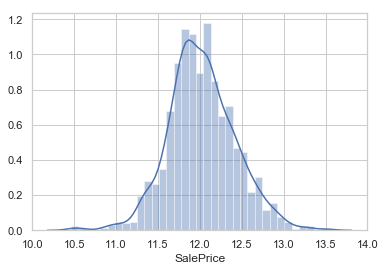

In [12]:
# now transforming the target variable

target = np.log(train['SalePrice'])
print("Target skew values is:{}".format(target.skew()))
sns.distplot(target)

As you saw, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal. Since we have 80 variables, visualizing one by one wouldn't be an astute approach. Instead, we'll look at some variables based on their correlation with the target variable. However, there's a way to plot all variables at once, and we'll look at it as well. Moving forward, we'll separate numeric and categorical variables and explore this data from a different angle.

In [13]:
# Separate variable into new data frames
numeric_data = train.select_dtypes(include= [np.number])
cat_data = train.select_dtypes(exclude= [np.number])
print(numeric_data.shape[1], cat_data.shape[1])

38 43


In [14]:
del numeric_data['Id']

Now, we are interested to learn about the correlation behavior of numeric variables. Out of 38 variables, I presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model.

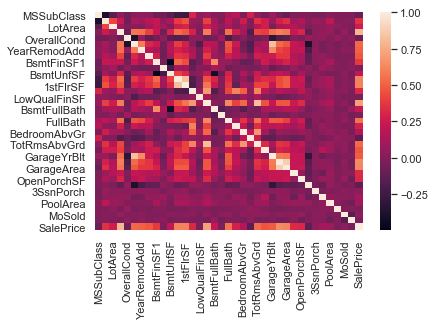

In [15]:
# Plotting the correlation between the numeric variables

corr = numeric_data.corr()
sns.heatmap(corr)

Notice the last row of this map. We can see the correlation of all variables against SalePrice. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [16]:
print(corr['SalePrice'].sort_values(ascending = False)[:15])
print("****************")
print(corr['SalePrice'].sort_values(ascending = False)[-5:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64
****************
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc.
Let's check the OverallQual variable in detail.


In [17]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The overall quality is measured on a scale of 1 to 10. Hence, we can fairly treat it as an ordinal variable. An ordinal variable has an inherent order. For example, Rank of students in class, data collected on Likert scale, etc.
 Let's check the median sale price of houses with respect to OverallQual. 
 We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

In [18]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot


,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


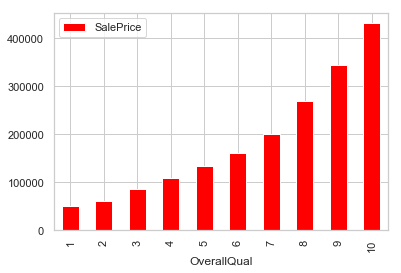

In [19]:
pivot.plot(kind='bar', color='red')

This behavior is quite normal. As the overall quality of a house increases, its sale price also increases. Let's visualize the next correlated variable GrLivArea and understand their behavior.

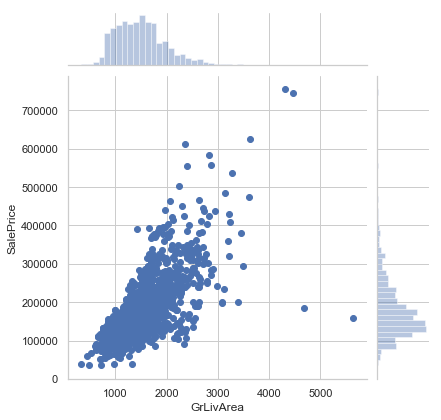

In [20]:
#GrLivArea variable
sns.jointplot(x= train['GrLivArea'], y = train['SalePrice'])

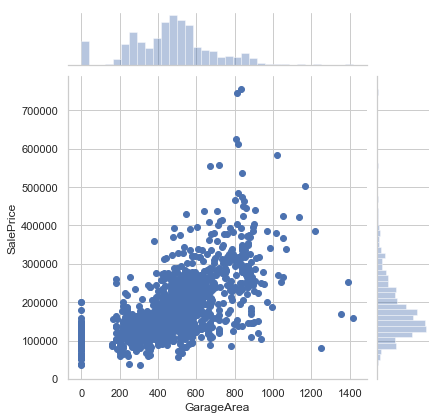

In [21]:
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'])

As seen above, here also we see a direct correlation of living area with sale price. However, we can spot an outlier value GrLivArea > 5000. I've seen outliers play a significant role in spoiling a model's performance. Hence, we'll get rid of it.

In [22]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Let's check the median sale price of a house based on its SaleCondition. SaleCondition explains the condition of sale. Not much information is given about its categories.m

In [23]:
sv_pivot = train.pivot_table(index = 'SaleCondition', values ='SalePrice', aggfunc = np.median)
sv_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


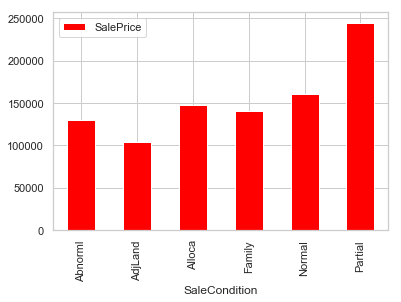

In [24]:
sv_pivot.plot(kind ='bar',color ='red')


We see that SaleCondition Partial has the highest mean sale price. Though, due to lack of information we can't generate many insights from this data. Moving forward, like we used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them.

c:\users\lenovo\desktop\env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\users\lenovo\desktop\env\lib\site-packages\scipy\stats\stats.py:2951: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


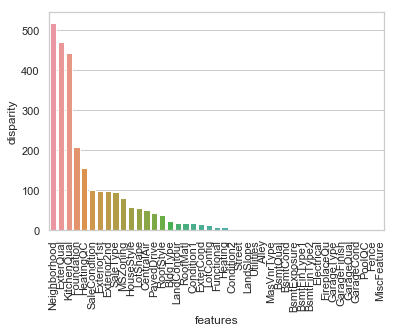

In [25]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt.show()

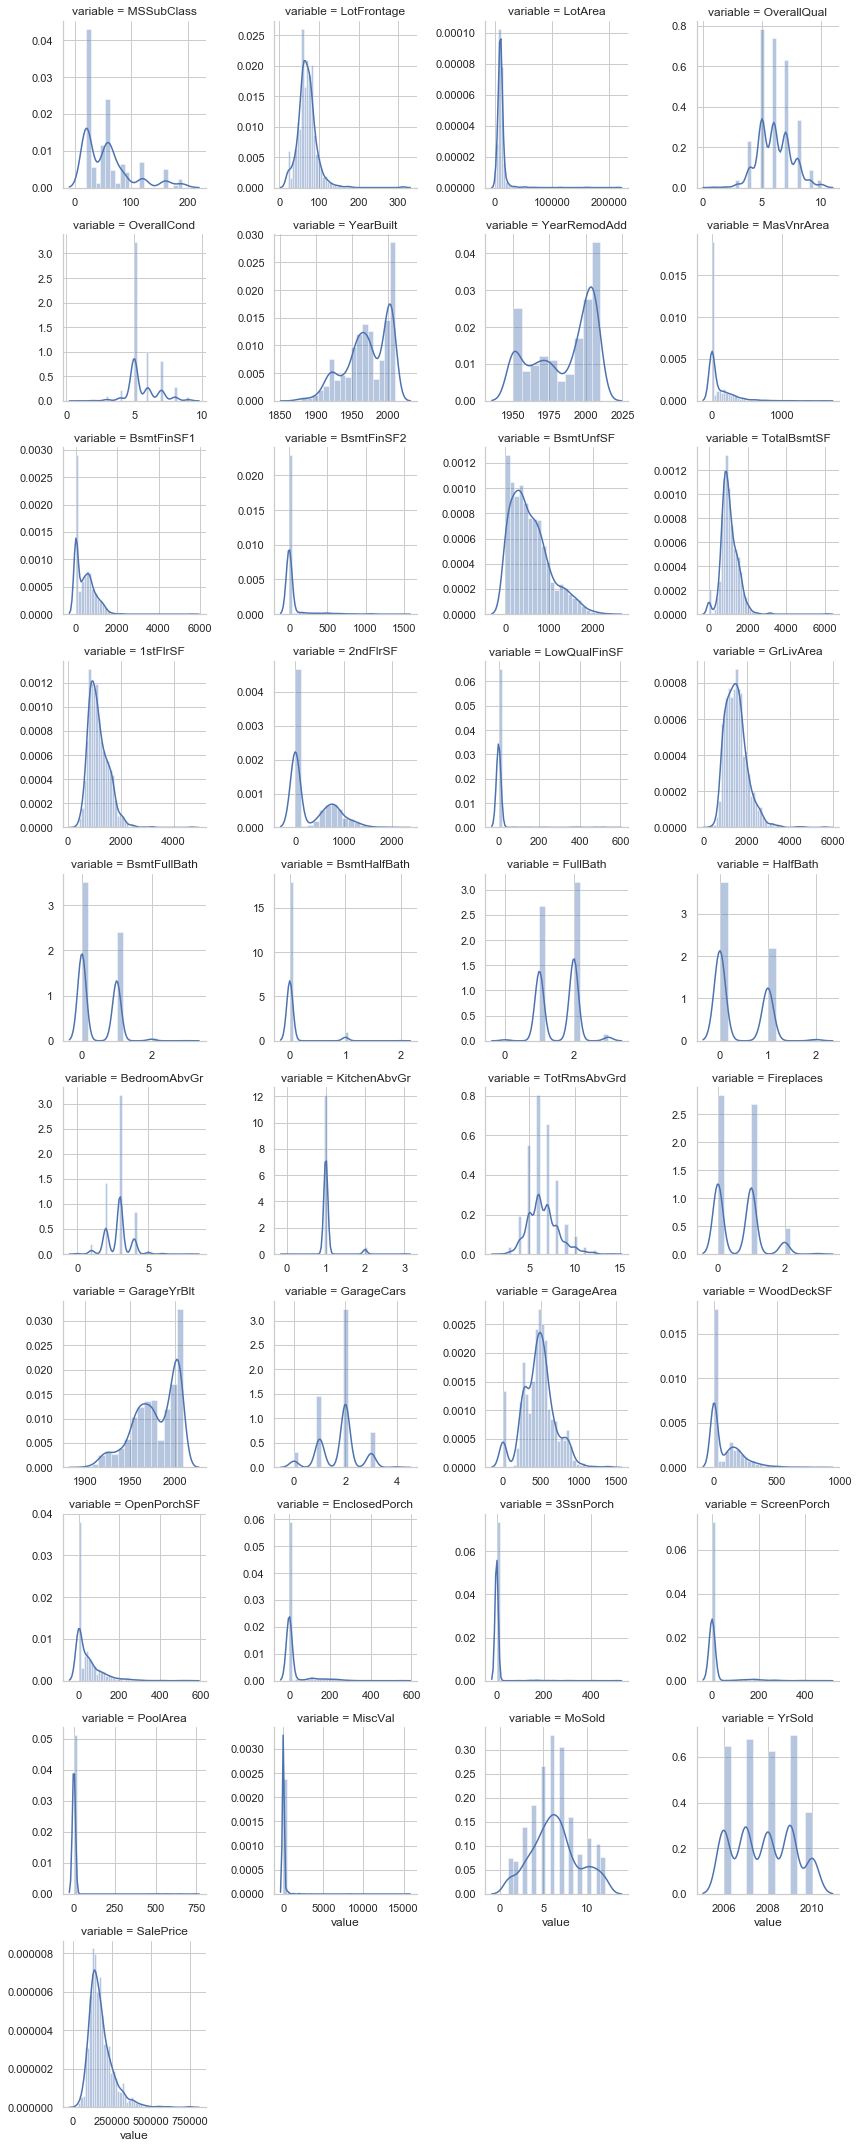

In [26]:
# num for numeric plot
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

As you can see, most of the variables are right skewed. We'll have to transform them in the next stage. Now, let's create boxplots for visualizing categorical variables.



c:\users\lenovo\desktop\env\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


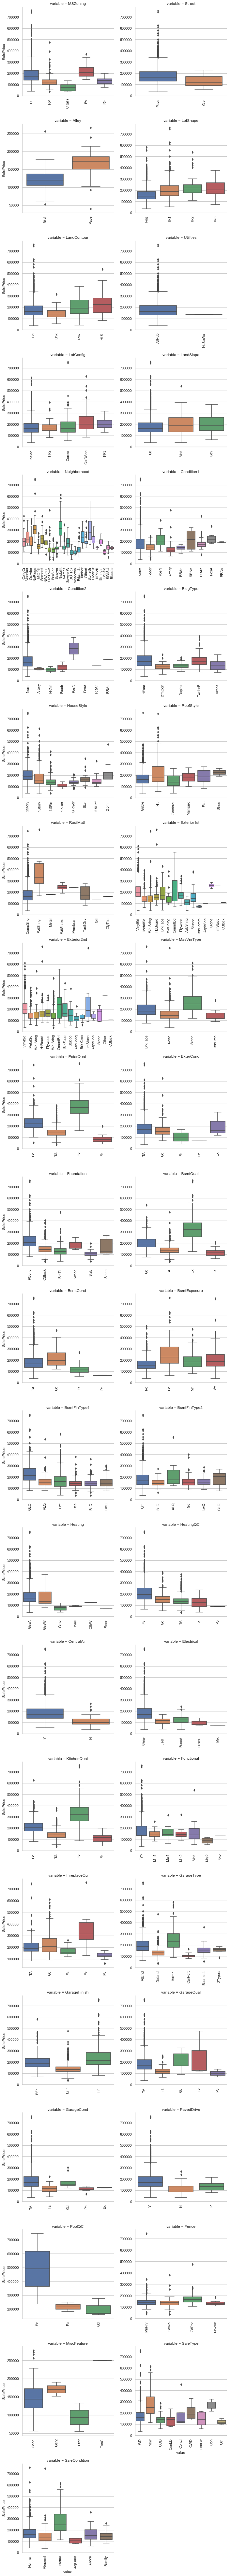

In [27]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)
cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

## Data Pre-Processing

In this stage, we'll deal with outlier values, encode variables, impute missing values, and take every possible initiative which can remove inconsistencies from the data set.As we discovered that the variable GrLivArea has outlier values. Precisely, one point crossed the 4000 mark. Let's remove that:

In [28]:
#removing outliers
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)

train.shape

(1456, 81)

In [29]:
#imputing using mode
test.loc[666, 'GarageQual'] = "TA" #stats.mode(test['GarageQual']).mode
test.loc[666, 'GarageCond'] = "TA" #stats.mode(test['GarageCond']).mode
test.loc[666, 'GarageFinish'] = "Unf" #stats.mode(test['GarageFinish']).mode
test.loc[666, 'GarageYrBlt'] = "1980" #np.nanmedian(test['GarageYrBlt'])` 

In row 1116, in test data, all garage variables are NA except GarageType. Let's mark it NA as well.

In [ ]:
#mark as missing
test.loc[1116, 'GarageType'] = np.nan

Now, we'll encode all the categorical variables. This is necessary because most ML algorithms do not accept categorical values, instead they are expected to be converted to numerical. LabelEncoder function from sklearn is used to encode variables. Let's write a function to do this:

In [30]:
#importing labelencoder function

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(data,var, fill_na = None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace = True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data

This function imputes the blank levels with mode values. The mode values are to be entered manually. Now, let's impute the missing values in LotFrontage variable using the median value of * LotFrontage by Neighborhood *. Such imputation strategies are built during data exploration. To do this, we should combine our train and test data so that we can modify both the data sets at once. Also, it'll save our time.

In [31]:
#combinde test data
alldata = train.append(test)
alldata.shape

c:\users\lenovo\desktop\env\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(2915, 81)

In [32]:
#impute lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
                alldata.loc[idx, 'LotFrontage'] = group.median()      

In [33]:
#imputing missing values
alldata["MasVnrArea"].fillna(0,inplace = True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

Variable names which have 'quality' or 'qual' in their names can be treated as ordinal variables, as mentioned above. Now, we'll convert the categorical variables into ordinal variables. To do this, we'll simply create a dictionary of key-value pairs and map it to the variable in the data set.

In [34]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
    factorize(alldata, x)

#encode variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

In [35]:
alldata["Street"] = alldata["Street"].map({np.nan:0, "Grvl": 1, "Pave": 2}).astype(int)
# Alley and Condition2 has been done already
alldata["Alley"] = alldata["Alley"].map({np.nan: 0, "Grvl": 1, "Pave": 2, "NA": 3}).astype(int)

In [36]:
alldata["Electrical"] = alldata["Electrical"].map({np.nan:0, "SBrkr": 1, "FuseA": 2,"FuseF": 3,"FuseP":4,"Mix":5}).astype(int)
alldata["GarageType"] = alldata["GarageType"].map({np.nan:0, "2Types": 1, "Attchd": 2,"Basment": 3,"BuiltIn":4,"CarPort":5,"Detchd":6}).astype(int)
alldata["Heating"] = alldata["Heating"].map({np.nan:0, "Floor": 1, "GasA": 2,"GasW": 3,"Grav":4,"OthW":5,"Wall":6}).astype(int)
alldata["LandContour"] = alldata["LandContour"].map({np.nan:0, "Lvl": 1, "Bnk": 2,"HLS": 3,"Low":4}).astype(int)
alldata["LandSlope"] = alldata["LandSlope"].map({np.nan:0, "Gtl": 1, "Mod": 2,"Sev": 3}).astype(int)
alldata["LotShape"] = alldata["LotShape"].map({np.nan:0, "Reg": 1, "IR1": 2,"IR2": 3,"IR3":4}).astype(int)
alldata["MiscFeature"] = alldata["MiscFeature"].map({np.nan:0, "Elev": 1, "Gar2": 2,"Othr": 3,"Shed":4,"TenC":5}).astype(int)
alldata["PavedDrive"] = alldata["PavedDrive"].map({np.nan:0, "Y": 1, "P": 2,"N": 3}).astype(int)
alldata["RoofMatl"] = alldata["RoofMatl"].map({np.nan:0, "ClyTile": 1, "CompShg": 2,"Membran": 3,"Metal":4,"Roll":5,"Tar&Grv":6,"WdShake":7,"WdShngl":8}).astype(int)
alldata["Utilities"] = alldata["Utilities"].map({np.nan:0, "AllPub": 1, "NoSewr": 2,"NoSeWa": 3,"ELO":4}).astype(int)





## Feature Engineering
The motive of feature engineering is to create new features which can help make predictions better.Now let's create new features from the given list of 81 features.
Most categorical variables have near-zero variance distribution. Near-zero variance distribution is when one of the categories in a variable has >90% of the values. We'll create some binary variables depicting the presence or absence of a category. The new features will contain 0 or 1 values. In addition, we'll create some more variables which are self-explanatory with comments.

In [37]:
#creating new variable (1 or 0) based on irregular count levels
#The level with highest count is kept as 1 and rest as 0

alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

#Did the modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1

alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

#setting levels with high count as 1 and the rest as 0
#you can check for them using the value_counts function

alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

c:\users\lenovo\desktop\env\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [38]:
alldata.shape

(2915, 100)

Now, we have 100 features in the data. It means we create 19 more columns. Let's continue and create some more features. Once again, we'll combine the original train and test files to create a parallel alldata2 file. This file will have original feature values. We'll use this data as reference to create more features.


In [39]:
#create alldata2
alldata2 = train.append(test)

alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

c:\users\lenovo\desktop\env\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Just like Garage, we have several columns associated with the area of the property. An interesting variable could be the sum of all areas for a particular house. In addition, we can also create new features based on the year the house built

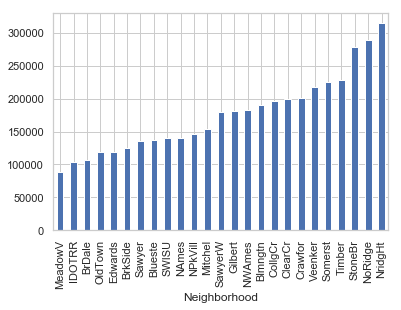

In [40]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

# Simplifications of existing features into bad/average/good based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')


The graph above gives us a good hint on how to combine levels of the neighborhood variable into fewer levels. We can combine bars of somewhat equal height in one category. To do this, we'll simply create a dictionary and map it with variable values.

In [41]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, 
                    "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
alldata.shape


(2915, 126)

Until this point, we've added 43 new features in the data set. Now, let's split the data into test and train and create some more features.

In [42]:
# Now split the data 

train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

print("train", train_new.shape)
print("test", test_new.shape)

train (1456, 126)
test (1459, 126)


Now, we'll transform numeric features and remove their skewness.

In [43]:
#get numeric features

numeric_features = [f for f in train_new.columns if train_new[f].dtypes != 'object']

# transform the numeric_features using log(x+1)

from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])

#del test_new['SalePrice']


c:\users\lenovo\desktop\env\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Now, we'll standardize the numeric features.



In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
       train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
      test_new[col] = scaled[:,i]

c:\users\lenovo\desktop\env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\lenovo\desktop\env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\users\lenovo\desktop\env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\lenovo\desktop\env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by Standard

Now, we'll one-hot encode the categorical variable. In one-hot encoding, every level of a categorical variable results in a new variable with binary values (0 or 1). We'll write a function to encode categorical variables:


In [45]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Divide  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [46]:
# Let's add the one-hot variables in our train data set.

train_new = train_new.join(onehot_df) 
train_new.shape

(1456, 433)

In [47]:
# This resulted in a whopping 433 columns. Similarly, we will add one-hot variables in test data as well.

#adding one hot features to test
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape

(1459, 418)

The difference in number of train and test columns suggests that some new features in the train data aren't available in the test data. Let's remove those variables and keep an equal number of columns in the train and test data.

In [48]:
train_new.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       '_YearBuiltBin_YearBin3', '_YearBuiltBin_YearBin4',
       '_YearBuiltBin_YearBin5', '_YearBuiltBin_YearBin6',
       '_YearBuiltBin_YearBin7', '_YearRemodAddBin_YearBin4',
       '_YearRemodAddBin_YearBin5', '_YearRemodAddBin_YearBin6',
       '_YearRemodAddBin_YearBin7', '_NeighborhoodBin_-0.04760808471778121'],
      dtype='object', length=433)

In [49]:
for i in train_new.columns:
    if i in test_new:
        pass
    else: 
        #train_new.drop(i, axis=1, inplace=True)
        print(i)
print(train_new.shape, test_new.shape)

_HouseStyle_2.5Fin
_Exterior1st_ImStucc
_Exterior1st_Stone
_Exterior2nd_Other
_Electrical_Mix
_MiscFeature_TenC
_Condition2_RRAe
_Condition2_RRAn
_Condition2_RRNn
_RoofMatl_Membran
_RoofMatl_Metal
_RoofMatl_Roll
_Heating_Floor
_Heating_OthW
_GarageQual_Ex
_PoolQC_Fa
_NeighborhoodBin_-0.04760808471778121
(1456, 433) (1459, 418)


In [50]:
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone",'_NeighborhoodBin_-0.04760808471778121',
"_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)
train_new.shape

(1456, 416)

In [51]:
print(train_new.shape, test_new.shape)

(1456, 416) (1459, 418)


In [52]:
for i in test_new.columns:
    if i in train_new.columns:
        pass
    else: 
        #test_new.drop(i,axis=1, inplace= True)
        print(i)
#print(train_new.shape, test_new.shape)

_MSSubClass_150
_NeighborhoodBin_-1.0875767879360991


In [54]:
#removing one column missing from train data
test_new.drop(["_MSSubClass_150","_NeighborhoodBin_-1.0875767879360991"], axis=1, inplace=True)

In [55]:
print(train_new.shape, test_new.shape)

(1456, 416) (1459, 416)


Now, we have an equal number of columns in the train and test data. Here, we'll remove a few more columns which either have lots of zeroes (hence doesn't provide any real information) or aren't available in either of the data sets.


In [56]:
# Drop these columns
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

# they have been dropped 


In [57]:
print(train_new.shape, test_new.shape)

(1456, 413) (1459, 413)


Let's transform the target variable and store it in a new array.

In [58]:
#create a label set
label_df = pd.DataFrame(index = train_new.index, columns = ['SalePrice'])
label_df['SalePrice'] = np.log(train['SalePrice'])
print("Training set size:", train_new.shape)
print("Test set size:", test_new.shape)

Training set size: (1456, 413)
Test set size: (1459, 413)


In [59]:
drop_cols = ["GarageYrBlt"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)



## Model Training and Evaluation
Since our data is ready, we'll start training models now. We'll use three algorithms: XGBoost, Neural Network and Lasso Regression. Finally, we'll ensemble the models to generate final predictions.`

In [61]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

regr.fit(train_new, label_df)

####These parameters’ values are derived using cross-validation.
#To evaluate the model's performance, we'll create a quick RMSE function.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
       silent=1, subsample=0.2, verbosity=1)

In [62]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(train_new)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))



XGBoost score on training set:  0.030561804146481002


In [63]:

# make prediction on test set
y_pred_xgb = regr.predict(test_new)

pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(y_pred_xgb)})
pred1.to_csv('xgbnono.csv', header=True, index=False)



In [64]:
read_pred1 = pd.read_csv('xgbnono.csv')
read_pred1.head()

,Id,SalePrice
0,1461,72908.29
1,1462,84670.00
2,1463,88995.44
3,1464,90258.65
4,1465,94371.39


Next, let's train the lasso model.